In [1]:
import requests
import pandas as pd
import numpy as np


In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()



In [57]:
team_colors={
    "Arsenal": "#C3291E",
    "Luton": "#F78F1E",
    "West Ham": "#7A263A",
    "Chelsea":"#034694",
    "Nottingham Forest": "#DD0000",
    "Spurs": "#000000",
    "Brentford": "red",
    "Bournemouth": "blue",
}

In [4]:
attacker_metrics = [
    'total_points',
    'goals_scored',
    'expected_goals', 
    'assists',
    'expected_assists', 
    'expected_goal_involvements', 
 #    'yellow_cards', 
#    'red_cards', 
#    'saves', 
    'bonus', 
    'bps', 
    'influence', 
    'creativity', 
    'threat', 
    'ict_index', 
    'starts', 
#    'value', 
#    'transfers_balance', 
#    'selected'
]
defender_metrics = [
    'minutes', 
    'clean_sheets', 
    'goals_conceded', 
    'own_goals', 
    'yellow_cards', 
    'red_cards', 
    'bonus', 
    'bps', 
    'influence', 
    'creativity', 
    'threat', 
    'ict_index', 
    'starts', 
    'expected_goal_involvements', 
    'expected_goals_conceded', 
#    'value', 
#    'transfers_balance', 
#    'selected'
]


In [5]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])


In [6]:
elements_df['position'] = elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

In [7]:
elements_df['team'] = elements_df.team.map(teams_df.set_index('id').name)


In [8]:
elements_df['value'] = elements_df.value_season.astype(float)

In [9]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [10]:
main_cols = [
    'full_name',
    'team',
#    'element_type',
    'selected_by_percent',
    'now_cost',
 #   'minutes',
#    'transfers_in',
    'value_season',
    'total_points',
    'expected_goals',
    'goals_scored', 
    'expected_assists',
    'assists',
    'expected_goals_conceded',
    'goals_conceded']

In [11]:
elements_df['full_name'] = elements_df['first_name'] + " " +  elements_df['second_name']

In [12]:
player_ids = elements_df[['full_name', 'id']].set_index('full_name').to_dict()['id']
player_photos = elements_df[['full_name', 'photo']].set_index('full_name').to_dict()['photo']


In [13]:
elements_df[main_cols].sort_values(by='total_points', ascending=False)

,full_name,team,selected_by_percent,now_cost,value_season,total_points,expected_goals,goals_scored,expected_assists,assists,expected_goals_conceded,goals_conceded
152,Solly March,Brighton,10.5,66,3.9,26,1.57,3,0.26,0,5.27,4
442,Rodrigo Hernandez,Man City,12.8,57,4.6,26,0.77,2,0.33,1,1.32,1
120,Bryan Mbeumo,Brentford,26.0,68,3.7,25,3.18,3,0.52,0,2.52,3
241,Raheem Sterling,Chelsea,16.5,72,3.2,23,0.85,2,0.53,1,3.46,4
643,Jarrod Bowen,West Ham,9.3,71,3.2,23,1.88,2,0.40,1,5.34,3
...,...,...,...,...,...,...,...,...,...,...,...,...
294,Ben Godfrey,Everton,0.2,44,0.0,0,0.00,0,0.00,0,0.00,0
698,Enso González,Wolves,0.0,50,0.0,0,0.00,0,0.00,0,0.00,0
335,Marek Rodák,Fulham,0.4,40,-0.2,-1,0.00,0,0.00,0,0.00,0
342,Calvin Bassey,Fulham,0.3,45,-0.2,-1,0.00,0,0.00,0,5.79,3


In [14]:
defence_choice = elements_df[(elements_df['minutes']>0) & (elements_df['element_type']==2)].sort_values(by='total_points', ascending=False)[main_cols].head(20)
defence_choice.rank()

,full_name,team,selected_by_percent,now_cost,value_season,total_points,expected_goals,goals_scored,expected_assists,assists,expected_goals_conceded,goals_conceded
258,6.0,10.0,15.0,9.5,19.5,19.5,14.0,17.0,11.5,6.0,10.0,7.5
36,12.0,2.5,8.0,9.5,19.5,19.5,20.0,20.0,14.0,6.0,14.0,17.5
624,4.0,18.5,20.0,9.5,18.0,18.0,19.0,17.0,1.0,6.0,7.0,2.0
143,15.0,5.0,16.0,19.0,15.0,17.0,15.0,17.0,20.0,18.5,20.0,17.5
632,5.0,18.5,5.0,9.5,16.5,16.0,12.0,7.5,15.0,14.0,13.0,7.5
247,2.0,7.0,18.0,15.0,14.0,15.0,17.0,17.0,6.0,6.0,12.0,15.5
230,10.0,7.0,7.0,1.0,16.5,14.0,11.0,7.5,10.0,18.5,3.0,7.5
473,16.0,14.5,12.0,15.0,11.0,13.0,18.0,17.0,4.0,6.0,19.0,15.5
222,3.0,7.0,11.0,20.0,3.5,10.0,16.0,7.5,19.0,14.0,5.5,12.5
636,13.0,18.5,3.0,4.0,12.5,10.0,8.0,7.5,4.0,6.0,17.0,7.5


In [15]:
defenders = elements_df[elements_df['element_type']==2][main_cols]

In [16]:
midfielders = elements_df[elements_df['element_type']==3][main_cols]
midfielders

,full_name,team,selected_by_percent,now_cost,value_season,total_points,expected_goals,goals_scored,expected_assists,assists,expected_goals_conceded,goals_conceded
2,Mohamed Elneny,Arsenal,0.1,44,0.0,0,0.00,0,0.00,0,0.00,0
3,Fábio Ferreira Vieira,Arsenal,0.1,54,1.3,7,0.04,0,0.22,2,0.25,1
5,Kai Havertz,Arsenal,2.4,73,0.7,5,0.34,0,0.43,0,2.53,2
8,Jorge Luiz Frello Filho,Arsenal,0.2,54,0.4,2,0.00,0,0.04,0,0.84,1
10,Marcus Oliveira Alencar,Arsenal,0.1,45,0.0,0,0.00,0,0.00,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
687,Pedro Lomba Neto,Wolves,0.3,55,1.8,10,0.97,0,0.84,1,4.93,5
688,Daniel Castelo Podence,Wolves,0.1,54,0.0,0,0.00,0,0.00,0,0.00,0
690,Pablo Sarabia,Wolves,0.2,50,1.6,8,0.36,0,0.65,1,1.13,0
694,Boubacar Traoré,Wolves,0.4,44,0.0,0,0.00,0,0.00,0,0.00,0


In [17]:
def player_photo(player_name):
    image = (elements_df[elements_df['full_name']==player_name]['photo'].values[0].replace('jpg', 'png'))
    return f"https://resources.premierleague.com/premierleague/photos/players/110x140/p{image}"


In [18]:
def fetch_player_data(player_id):
    playerurl = 'https://fantasy.premierleague.com/api/element-summary/{}/'.format(player_id)
    r = requests.get(playerurl)
    json = r.json()
    return json

In [19]:
def player_past_metrics(player_id, metrics, start_gameweek=0, gameweeks=6, agg=None):
    json = fetch_player_data(player_id)
    end_gameweek = start_gameweek + gameweeks
    result = {}
    for metric in metrics:
        metrics = [i[metric] for i in json['history'][start_gameweek:end_gameweek]]
        if agg == 'mean':
            if type(metrics[0]) == str:
                metrics = [float(i) for i in metrics]
            result[metric] = np.mean(metrics)
        elif agg == 'sum':
            if type(metrics[0]) == str:
                metrics = [float(i) for i in metrics]
            result[metric] = np.sum(metrics)
        elif agg is None:
            result[metric] = metrics
    return result
saka_metrics = player_past_metrics(player_ids['Bukayo Saka'], attacker_metrics, agg='mean')

In [20]:
type('yo') == str

True

In [38]:
def compare_players(player_names, metrics, agg=None):
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: rgba(0,200,0,0.2)' if cell else '' for cell in is_max]

    columns = []
    for player_name in player_names:
        player_metrics = player_past_metrics(player_ids[player_name], metrics, agg=agg)
        if type(list(player_metrics.values())[0]) == list:
            player_metrics_values = [", ".join([str(j) for j in i]) for i in list(player_metrics.values())]
        else:
            player_metrics_values = list(player_metrics.values())
        columns.append(pd.Series(player_metrics_values, name=player_name))
    df = pd.DataFrame(
        data = {
            'Metric': metrics
        }
    )
    df = pd.concat(columns, axis=1)
    df.index = [i.replace("_", " ").title() for i in metrics]
    return df.round(1).style.apply(highlight_max, axis=1).format("{:.2f}")
compare_players(['Bukayo Saka', 'James Maddison'], attacker_metrics, 'mean')

,Bukayo Saka,James Maddison
Total Points,7.00,7.30
Goals Scored,0.70,0.30
Expected Goals,0.60,0.40
Assists,0.00,0.70
Expected Assists,0.50,0.50
Expected Goal Involvements,1.00,1.00
Bonus,1.30,1.30
Bps,26.00,25.70
Influence,38.50,36.20
Creativity,46.60,49.40


In [22]:
#player_past_metrics(player_ids['Malo Gusto'],  )

In [23]:
def total_difficulty(player_id, start_gameweek=0, gameweeks=6):
    playerurl = 'https://fantasy.premierleague.com/api/element-summary/{}/'.format(player_id)
    r = requests.get(playerurl)
    json = r.json()
    end_gameweek = start_gameweek + gameweeks
    #print([i['difficulty'] for i in json['fixtures'][start_gameweek:end_gameweek]])
    return np.mean([i['difficulty'] for i in json['fixtures'][start_gameweek:end_gameweek]])

In [24]:
def difficulty_range(player_id, start_gameweek=0, end_gameweek=6, gwrange=3):
    result = []
    for i in range(end_gameweek):
        diff = total_difficulty(player_id, start_gameweek=i, gameweeks=gwrange)
        result.append(diff)
    return result

In [25]:
def format_chart(ax, xlabel=None, ylabel=None, title=None):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title, loc='left', fontsize=10)
    return ax

In [26]:
def compare_team(metric, team, title=None, short_team_name=None):
    df = teams_df[[
        'name',
        metric
    ]].sort_values(by=metric, ascending=True)
    df = df.reset_index().drop('index', axis=1)
    if short_team_name is None:
        team_index = df[df['name']==team].index.values[0]
    else:
        team_index = df[df['name']==short_team_name].index.values[0]
    ax = df.set_index('name').plot(kind='barh', legend=False, figsize=(2,4), color='#ccc')
    ax = format_chart(ax, title=title)
    ax.tick_params(axis='y', length=0)
    ax.get_children()[team_index].set_color(team_colors[team])
    return ax

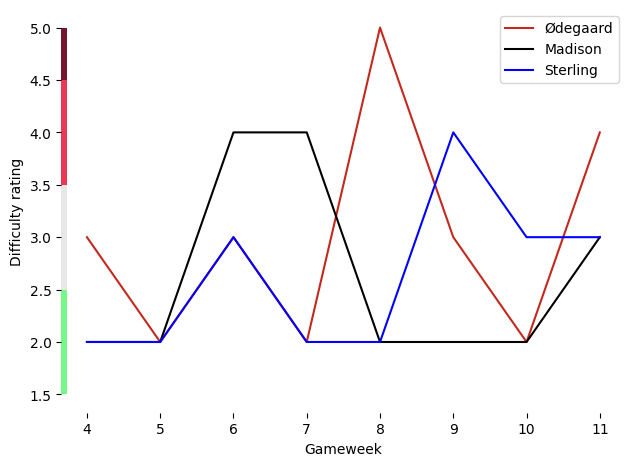

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
df = pd.DataFrame(data={
    'Ødegaard':difficulty_range(player_ids['Martin Ødegaard'], end_gameweek=8, gwrange=1),
    'Madison':difficulty_range(player_ids['James Maddison'], end_gameweek=8, gwrange=1),
    'Sterling':difficulty_range(player_ids['Raheem Sterling'], end_gameweek=8, gwrange=1)
})
df
df.index = df.index+4
df

width_px = 1456
height_px = 1048
dpi = 200
figsize = (width_px / dpi, height_px / dpi)


ax = df.plot(kind='line', color=['#C3291E', 'black', 'blue'], figsize=figsize)

ax = format_chart(ax, xlabel="Gameweek", ylabel="Difficulty rating")

ax.axhspan(3.5, 4.5, 0, 0.01, facecolor='#EA3956')
ax.axhspan(4.5, 5, 0, 0.01,facecolor='#75182E')
ax.axhspan(2.5, 3.5, 0, 0.01,facecolor='#E7E7E7')
ax.axhspan(1.5, 2.5, 0, 0.01,facecolor='#74F888')

plt.show()


In [28]:
player_id = player_ids['Erling Haaland']
playerurl = 'https://fantasy.premierleague.com/api/element-summary/{}/'.format(player_id)
r = requests.get(playerurl)
json = r.json()

In [29]:
player_photo('Raheem Sterling')
player_photo('James Maddison')
#player_photo('Martin Ødegaard')


'https://resources.premierleague.com/premierleague/photos/players/110x140/p172780.png'

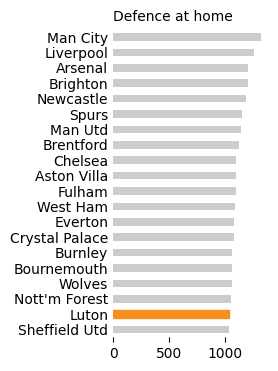

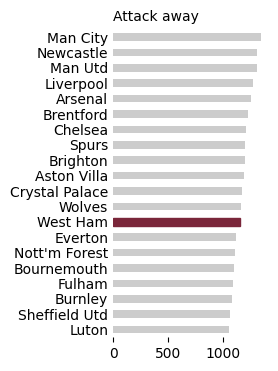

In [30]:
teams_df.columns
ax = compare_team('strength_defence_home', "Luton", title="Defence at home")
#ax.plot()

teams_df.columns
ax = compare_team('strength_attack_away', "West Ham", title="Attack away")



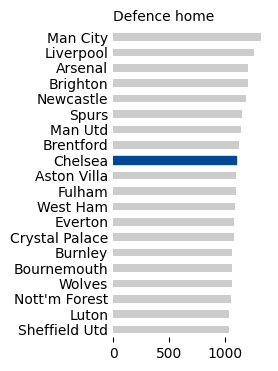

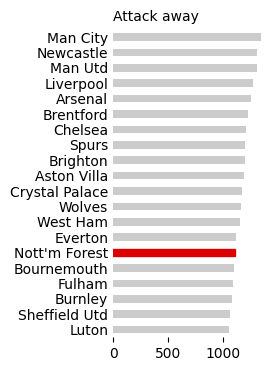

In [31]:

ax = compare_team('strength_defence_home', 'Chelsea', 'Defence home')
ax = compare_team('strength_attack_away', 'Nottingham Forest', short_team_name="Nott'm Forest", title="Attack away")




In [32]:
df = teams_df[[
        'name',
        'strength_defence_home'
    ]].sort_values(by='strength_defence_home', ascending=True)
df = df.reset_index().drop('index', axis=1)
df
df[df['name']=='West Ham'].index.values[0]

8

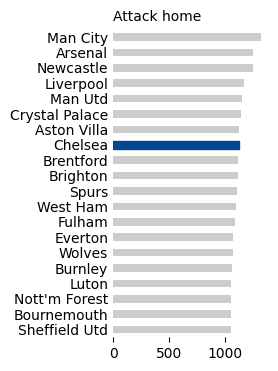

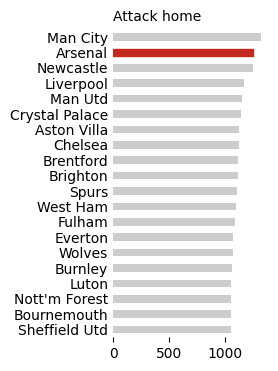

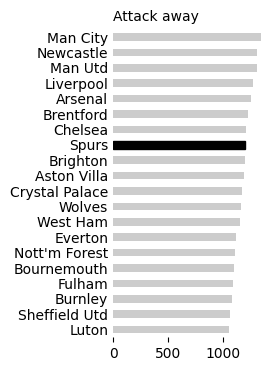

In [33]:

ax = compare_team('strength_attack_home', 'Chelsea', 'Attack home')
ax = compare_team('strength_attack_home', 'Arsenal', 'Attack home')
ax = compare_team('strength_attack_away', 'Spurs', short_team_name="Spurs", title="Attack away")




In [34]:
teams_df

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1230,1285,1250,1250,1210,1320,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1115,1175,1130,1190,1100,1160,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1060,1095,1050,1100,1060,1090,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,...,None,False,0,1125,1205,1120,1220,1130,1190,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,...,None,False,0,1165,1210,1120,1200,1210,1240,131
5,90,0,None,6,0,Burnley,0,0,0,BUR,...,None,False,0,1060,1080,1060,1080,1060,1080,43
6,8,0,None,7,0,Chelsea,0,0,0,CHE,...,None,False,0,1115,1160,1130,1210,1100,1110,4
7,31,0,None,8,0,Crystal Palace,0,0,0,CRY,...,None,False,0,1100,1100,1140,1170,1080,1085,6
8,11,0,None,9,0,Everton,0,0,0,EVE,...,None,False,0,1075,1100,1070,1120,1080,1080,7
9,54,0,None,10,0,Fulham,0,0,0,FUL,...,None,False,0,1095,1100,1090,1090,1100,1140,34


In [35]:
compare_players(['Issa Kaboré', 'Malo Gusto'], metrics=defender_metrics, agg='sum')

,Minutes,Clean Sheets,Goals Conceded,Own Goals,Yellow Cards,Red Cards,Bonus,Bps,Influence,Creativity,Threat,Ict Index,Starts,Expected Goal Involvements,Expected Goals Conceded
Issa Kaboré,132.00,0.00,3.00,0.00,1.00,0.00,0.00,16.00,4.60,16.60,12.00,3.30,2.00,0.30,3.10
Malo Gusto,186.00,1.00,2.00,0.00,0.00,0.00,2.00,71.00,58.80,36.70,8.00,10.40,2.00,0.30,1.40


In [36]:
compare_players(['Martin Ødegaard', 'Raheem Sterling', 'James Maddison'], metrics=attacker_metrics, agg='mean')

,Total Points,Goals Scored,Expected Goals,Assists,Expected Assists,Expected Goal Involvements,Bonus,Bps,Influence,Creativity,Threat,Ict Index,Starts
Martin Ødegaard,5.00,0.30,0.40,0.00,0.10,0.50,1.00,17.70,22.80,18.50,21.70,6.30,1.00
Raheem Sterling,7.70,0.70,0.30,0.30,0.20,0.50,1.00,24.30,33.50,27.60,42.00,10.30,1.00
James Maddison,7.30,0.30,0.40,0.70,0.50,1.00,1.30,25.70,36.20,49.40,32.70,11.80,1.00


In [37]:
top10 = elements_df[elements_df['element_type']==3].sort_values(by='total_points', ascending=False)['full_name'].values[:10]
compare_players(top10, attacker_metrics, agg='mean')

,Total Points,Goals Scored,Expected Goals,Assists,Expected Assists,Expected Goal Involvements,Bonus,Bps,Influence,Creativity,Threat,Ict Index,Starts
Rodrigo Hernandez,8.70,0.70,0.30,0.30,0.10,0.40,1.70,33.30,47.50,15.50,34.30,9.70,1.00
Solly March,8.70,1.00,0.50,0.00,0.10,0.60,1.30,27.70,46.90,23.80,37.30,10.80,1.00
Bryan Mbeumo,8.30,1.00,1.10,0.00,0.20,1.20,1.00,22.30,40.10,21.00,42.00,10.30,1.00
Raheem Sterling,7.70,0.70,0.30,0.30,0.20,0.50,1.00,24.30,33.50,27.60,42.00,10.30,1.00
Jarrod Bowen,7.70,0.70,0.60,0.30,0.10,0.80,1.70,23.70,36.90,18.40,41.70,9.70,1.00
Moussa Diaby,7.30,0.70,0.30,0.30,0.10,0.40,0.70,25.30,35.60,25.20,31.70,9.30,1.00
James Maddison,7.30,0.30,0.40,0.70,0.50,1.00,1.30,25.70,36.20,49.40,32.70,11.80,1.00
Bukayo Saka,7.00,0.70,0.60,0.00,0.50,1.00,1.30,26.00,38.50,46.60,44.70,13.00,1.00
Kaoru Mitoma,6.00,0.30,0.20,0.70,0.60,0.80,1.00,25.30,32.10,47.80,29.70,11.00,1.00
Diogo Teixeira da Silva,5.70,0.30,0.30,0.70,0.10,0.30,0.70,16.00,14.90,16.70,38.70,7.00,0.70


In [43]:
compare_players(['James Maddison', 'Phil Foden', 'Raheem Sterling'], metrics=attacker_metrics, agg='mean')

,James Maddison,Phil Foden,Raheem Sterling
Total Points,7.30,5.30,7.70
Goals Scored,0.30,0.00,0.70
Expected Goals,0.40,0.20,0.30
Assists,0.70,0.70,0.30
Expected Assists,0.50,0.30,0.20
Expected Goal Involvements,1.00,0.50,0.50
Bonus,1.30,1.00,1.00
Bps,25.70,19.00,24.30
Influence,36.20,23.00,33.50
Creativity,49.40,48.80,27.60


In [53]:
df = pd.DataFrame(data={
    'Foden':difficulty_range(player_ids['Phil Foden'], end_gameweek=3, gwrange=1),
    'Madison':difficulty_range(player_ids['James Maddison'], end_gameweek=3, gwrange=1),
    'Sterling':difficulty_range(player_ids['Raheem Sterling'], end_gameweek=3, gwrange=1)
})
df.index.name = 'Game week'
df.index = df.index+4
df

,Foden,Madison,Sterling
Game week,,,
4,2.0,2.0,2.0
5,3.0,2.0,2.0
6,2.0,4.0,3.0


In [54]:
compare_players(['Erling Haaland', 'Michail Antonio', 'Bryan Mbeumo'], metrics=attacker_metrics, agg='mean')

,Erling Haaland,Michail Antonio,Bryan Mbeumo
Total Points,6.30,5.70,8.30
Goals Scored,1.00,0.70,1.00
Expected Goals,1.00,0.30,1.10
Assists,0.00,0.00,0.00
Expected Assists,0.00,0.10,0.20
Expected Goal Involvements,1.00,0.40,1.20
Bonus,1.00,1.30,1.00
Bps,23.70,22.00,22.30
Influence,35.00,28.60,40.10
Creativity,16.10,5.00,21.00


In [58]:
compare_team("Brentford", "Bournmouth")

KeyError: "['Brentford'] not in index"